# Tipos de error

En estadística a veces se realizan hipótesis que pueden ser ciertas o falsas con cierto grado de confianza.

Partimos de dos hipótesis:
* Hipótesis nula, $H_0$: Es la hipótesis original, la que generalmente intentamos probar o desmentir.
* Hipótesis alternativa, $H_1$: Es la hipótesis que tenemos que aceptar cuando $H_0$ se demuestra falsa.

**Ejemplos de hipótesis:**

Sobre la altura de las personas.
* $H_0$: La media de la altura en España es 1.80m.
* $H_1$: La media de la altura en España NO es 1.80m.

Sobre el color de los perros:
* $H_0$: Todos los perros son verdes.
* $H_1$: Algún perro no es verde.

Sobre pruebas médicas:
* $H_0$: No está embarazada.
* $H_1$: Sí está embarazada.




Si nuestro test estadístico dice que la hipótesis $H_1$ es cierta pero en realidad la que es cierta es la hipótesis $H_0$ estaremos cometiendo un error.
El tipo de error depende de si nos hemos equivocado prediciendo $H_0$ o $H_1$.

||$H_0$ cierta|$H_1$ cierta|
|-|-|-|
|Elegimos $H_0$| No hay error |Error tipo II, falso negativo|
|Elegimos $H_1$| Error tipo I, falso positivo| No hay error |


### p-valor

En los tests estadísitcos trataremos de confirmar o desmentir la hipótesis nula $H_0$ mediante un valor de confianza llamado $p-value$


# Comparando dos grupos de datos cuantitavos

## T-test de student

El t-test es usado cuando tienes dos grupos de datos y quieres saber si la media de ambos grupos es igual o no. Tenemos dos hipótesis:
\\[H_0 : \mu(X) = \mu(Y) \\]
\\[H_1 : \mu(X) \ne \mu(Y) \\]

Empezamos con las siguientes asumpciones:
1. Las muestras han sido seleccionas por muestreo aleatorio simple dentro de la población.
2. Las poblaciones siguen una distribución normal. (sino usar test Wilcoxon-Mann-Whitney)
3. Ambas poblaciones tienen la misma varianza. (sino usar test Welch)
4. Las poblaciones no están correladas. (sino usar t-test emparejado)

Primero calculamos la media y varianza de ambos grupos. El test para verificar si la hipótesis nula $H_0$ es cierta puede ser calculado como sigue:

\\[ t=\frac{E[X]-E[Y]}{s_p·\sqrt{\frac{1}{n_x}+\frac{1}{n_y}}} \\]

Donde $s_p$ es la desviación estandar compuesta, calculada como:

\\[ s^2_p=\frac{(n_x-1)Var[X]+(n_y-1)Var[Y]}{n_x+n_y-2} \\]

Donde $n_x$ y $n_y$ son los números de muestras en cada uno de los grupos muestreados. El número de grados de libertad es 
$d.f.=n_x+n_y-2$. Podemos asumir que las dos varianzas son iguales si ambas pasan el test de varianza de Fisher(F-test).


### Funciones en R

Supongamos que tenemos dos variables aleatorias X, con 10 muestras, e Y, con 15 muestas. Queremos saber si ambas proceden de la misma población. Una forma de saberlo es calcular la media de X e Y.
A continuación calcular el test t-student y ver el p-valor. 

* Un valor muy **bajo**, por ejemplo inferior a 0.05, nos llevaría a rechazar la hipótesis nula $H_0$ y afirmar que las medias son tan diferentes que probablemente vendrán de poblaciones distintas.
* Un p-valor **alto** nos indicaría que la hipótesis $H_0$ es posible que sea cierta.



In [59]:
set.seed(123)
nx<-10
ny<-15
X<-rnorm(nx,mean=7,sd=3)
Y<-rnorm(ny,mean=8,sd=3)
sp<-sqrt(((nx-1)*var(X)+(ny-1)*var(Y))/(nx+ny-2))
t<-(mean(X)-mean(Y))/(sp*sqrt(1/nx+1/ny))
pvalue<-pt(t,nx+ny-2)*2
print(paste("El pvalor es",pvalue))

[1] "El pvalor es 0.699891449630045"


El p-valor es aproximadamente 0.7, lo que signififa que es bastante probable que las medias de X e Y sean iguales. Por lo tanto en este caso no podemos rechazar la hipótesis nula $H_0$. 

El mismo procedimiento lo podemos ejecutar usando la función *t.test*:

In [60]:
t.test(X,Y,var.equal=TRUE)


	Two Sample t-test

data:  X and Y
t = -0.39032, df = 23, p-value = 0.6999
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -2.899342  1.978902
sample estimates:
mean of x mean of y 
 7.223877  7.684097 


## t-test de Welch

Este test es usado cuando asumimos que las dos poblaciones no tienen porqué tener la misma varianza. El test estdístico es calculado así:
\\[ t=\frac{E[X]-E[Y]}{s_{\bar{\Delta}}} \\]

donde
\\[ s_{\bar{\Delta}}=\sqrt{\frac{Var[X]}{n_x}+\frac{Var[Y]}{n_y}} \\]

Y el número de grados de libertad es:
\\[ d.f.= \frac{\left(\frac{Var[X]}{n_x}+\frac{Var[Y]}{n_y} \right)^2}{\frac{\left( \frac{Var[X]}{n_x} \right)^2}{n_x-1} + \frac{\left( \frac{Var[Y]}{n_y} \right)^2}{n_y-1}} \\]

### Funciones en R

Supongamos que al igual que en el caso anterior tenemos dos variables aleatorias X, con 10 muestras, e Y, con 15 muestas. Queremos saber si ambas proceden de la misma población. Una forma de saberlo es calcular la media de X e Y sin asumir que ambos grupos tienen la misma varianza. A continuación calcular el test t-student y ver el p-valor.



In [65]:
set.seed(123)
X<-rnorm(nx,mean=7,sd=3)
Y<-rnorm(ny,mean=10,sd=0.1)
sd<-sqrt(var(X)/nx+var(Y)/ny)
t<-(mean(X)-mean(Y))/(sd)
df<-(var(X)/nx+var(Y)/ny)^2/((var(X)/nx)^2/(nx-1)+(var(Y)/ny)^2/(ny-1))
pvalue<-pt(t,df)*2
print(paste("El pvalor es",pvalue))

[1] "El pvalor es 0.0136516316049945"


Esto se puede hacer en R con el comando *t.test*:

In [66]:
t.test(X,Y,var.equal = FALSE)


	Welch Two Sample t-test

data:  X and Y
t = -3.0553, df = 9.0137, p-value = 0.01365
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -4.8127864 -0.7183995
sample estimates:
mean of x mean of y 
 7.223877  9.989470 


En este caso esl p-valor es realmente bajo, así que podemos rechazar la hipótesis nula y asumir que ambas medias no son iguales.

## T-test emparejado

Este test es usado cuando hay **dos grupos** de datos los cuales están **correlados** y quieres saber si la media de ambos grupos es la misma o no. Esto puede ser usado por ejemplo para comprobar un estudio médico y queremos comprobar si los valores han cambiado antes y después del tratamiento. La hipóteis nula dice que la diferencia entre las dos medias es igual a $\mu_0$
\\[H_0 : \mu(X) - \mu(Y) = \mu_0 \\]
\\[H_1 : \mu(X) -\mu(Y) \ne \mu_0 \\]
El test estadístico es calculado de la media y varianza de la diferencia de las dos muestras:
\\[ t=\frac{E[X-Y]-\mu_0}{\sqrt{var[X-Y]/n}}\\]

### Funciones en R



In [67]:
n<-20
X<-rnorm(n,mean=5,sd=4)
Y<-X-rnorm(n,mean=3,sd=2)
mu0<-3
D<-X-Y
t<-(mean(D)-mu0)/(sqrt(var(D)/nx))
pvalor<-pt(t,n-1)*2
print(paste("El pvalor es",pvalor))

[1] "El pvalor es 0.749034550097531"


O con la función *t.test*

In [69]:
t.test(X,Y,mu=mu0,paired=TRUE)


	Paired t-test

data:  X and Y
t = -0.45905, df = 19, p-value = 0.6514
alternative hypothesis: true difference in means is not equal to 3
95 percent confidence interval:
 2.096329 3.578581
sample estimates:
mean of the differences 
               2.837455 


## Wilcoxon-Mann-Whitney test

El U-test Mann-Whitney es usado para **comparar si dos variables independientes vienen de la misma distribución**. Funciona bajo las siguientes suposiciones:
* Todas las observaciones de ambos grupos son independientes entre sí,
* Las respuestas son ordinales (es decir, se puede decir al menos, de dos observaciones, caul es la mayor)
* Bajo la hipótesis nula $H_0$, la probabilidad de que una observación de la población X supere una observación de la segunda población Y es igual a la probabilidad de que una observación de Y exceda una observación de X. 
* La hipótesis alternativa $H_1$ es la probabilidad de que una observación de la población X que excede una observación de la segunda población Y sea diferente de la probabilidad de que una observación de Y exceda una observación de X. La alternativa también puede establecerse en términos de una sola prueba a los lados, por ejemplo: P (X> Y)> P (Y> X).

Las hipótesis son:
\\[
\begin{split}
H_0 : P(X > Y) = P(Y > X) \\
H_1 :P(X > Y) \ne P(Y > X)
\end{split}
\\]


### Funciones en R

Esto puede ser calculado en R con la función $wilcox.test$

In [71]:
mtcars$mpg

[1] 21.0 21.0 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 17.8 16.4 17.3 15.2 10.4
[16] 10.4 14.7 32.4 30.4 33.9 21.5 15.5 15.2 13.3 19.2 27.3 26.0 30.4 15.8 19.7
[31] 15.0 21.4

In [72]:
mtcars$am 

[1] 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1

In [73]:
wilcox.test(mpg ~ am, data=mtcars) 

Warning message in wilcox.test.default(x = c(21.4, 18.7, 18.1, 14.3, 24.4, 22.8, :
“cannot compute exact p-value with ties”


	Wilcoxon rank sum test with continuity correction

data:  mpg by am
W = 42, p-value = 0.001871
alternative hypothesis: true location shift is not equal to 0


Podemos asumir que el consumo de gasolina de un coche (mtcars\$mpg, miles per gallon), es independiente de si el coche es o no automático (mtcars\$am) porque el valor tan bajo del p-valor nos obliga a rechazar la hipótesis nula.

## Test de varianza Fisher

El test F es usado cuando se tienen dos grupos de datos y se quiere saber si la **varianza** de ambos grupos es la misma. Esto significa que las variables son homocedasticas. La hipótesis con la que trabaja este test es :
\\[H_0 : \sigma(X) = \sigma(Y) \\]
\\[H_1 : \sigma(X) \ne \sigma(Y) \\]

The test statistic is based on the quotient of the two variances:
\\[F=\frac{Var[X]}{Var[Y]}\\]

this follows an [F-distribution](https://en.wikipedia.org/wiki/F-distribution) with $$n_x-1$$ and $$n_y-1$$ degrees of freedom.


# Comparando distintos grupos de datos

## ANOVA 1 variable

Usamos ANOVA para comparar las medias de tres o más grupos de datos. Es decir, compara una variable dependiente (los datos de entrada) con una variable independiente  que tiene tres o más niveles (uno por cada grupo). Cada nivel identifica cada uno de los grupos de datos. La hipótesis nula afirma qeu todos los grupos tienen la misma media:
\\[
\begin{split}
H_0 : \mu_1 = \mu_2 = ... = \mu_k \\
H_1 : \text{at leas one pair }\mu_j\ne \mu_i 
\end{split}
\\]
Estas hipótesis examinan si las muestras siguen la siguiente regresión lineal: $y_{ij}=\mu_j+\varepsilon_{ij}$, donde:
* $y_{ij}$ es la variable dependiente, muestra i-ésima del grupo j.
* $\mu_j$ es la media real de grupo j, de la población total (desconocida pero estimable)
* $\varepsilon_{ij}$ son los errores resultantes del modelo
* $\bar{y}_j$ es la media muestral del grupo j
* $k$ es el número de grupos
* $n_j$ es el número de muestras del grupo j
* $n=\sum_{j=1}^{k}n_j$ es el número total de muestras

El test-F omnibus test en anova de una variable es:
\\[
F=\frac{\sum_{j=1}^{k} n_j \left ( \bar{y_j}-\bar{y} \right )^2 / \left ( k-1 \right ) }{\sum_{j=1}^{k} \sum_{i=1}^{n_j} \left ( y_{ij}-\bar{y_j} \right )^2 / \left ( n-k \right ) }=\frac{\text{Suma cuadrádica de residuos en cada grupo}}{\text{Suma cuadrádica de residuos dentro de un grupo}}
\\]

ANOVA produce un test estadístico F, la relación de la varianza calculada entre los medios a la varianza dentro de las muestras. * Si los medios del grupo provienen de poblaciones con los mismos valores medios, la varianza entre los medios del grupo debe ser menor que la varianza de las muestras *, siguiendo el teorema del límite central. Por lo tanto, una relación más alta implica que las muestras se tomaron de poblaciones con diferentes valores medios.

Cuando solo hay dos medios para comparar la prueba t de Student (se debe usar la prueba t de Student), la prueba t y la prueba F son equivalentes; la relación entre ANOVA y t viene dada por $F = t^2$.



Suposiciones de ANOVA:
* La variable dependiente está distribuida sigue una distribución normal en cada grupo.
* Hay homogeneidad de varianzas.
* Las observaciones son independientes.


### Funciones en R

In [77]:
set.seed(123)
n1<-40; n2<-50; n3<-70
m1<-18; m2<-15; m3<-15
sd<-7

a1<-rnorm(n1,mean=m1,sd=sd)
a2<-rnorm(n2,mean=m2,sd=sd)
a3<-rnorm(n3,mean=m3,sd=sd)

ma1<-mean(a1)
ma2<-mean(a2)
ma3<-mean(a3)
ma<-mean(c(a1,a2,a3))
masq_between_group<-n1*(ma1-ma)^2+n2*(ma2-ma)^2+n3*(ma3-ma)^2
df_between_group<-3-1
mean_square_value_between_group<-masq_between_group/df_between_group

masq_within_group<-sum((a1-ma1)^2)+sum((a2-ma2)^2)+sum((a3-ma3)^2)
df_within_group<-n1-1+n2-1+n3-1
mean_square_value_within_group<-masq_within_group/df_within_group

F<-mean_square_value_between_group/mean_square_value_within_group

pvalue<-1-pf(F,df_between_group,df_within_group)
print(paste("El pvalor es",pvalue))

[1] "El pvalor es 0.00907240548036725"


El p-valor es realmente bajo, por lo que podemos rechazar la hipótesis nula. Esto significa que no todos los grupos tienen la misma media. Se puede calcular con la función *aov*.

In [78]:
df <- rbind(data.frame(value=a1,cl="1"),data.frame(value=a2,cl="2"),data.frame(value=a3,cl="3"))
summary(aov( value ~ cl, data=df))

             Df Sum Sq Mean Sq F value  Pr(>F)   
cl            2    416  208.00   4.846 0.00907 **
Residuals   157   6738   42.92                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

### Test de Tukey

El test de Tukey también conocido como test HSD (honest significant difference), puede ser usado para encontrar las medias que son significativamente diferentes de cada uno de los grupos. El test de Tukey compara las medias de cada grupo respecto a las medias de cada otro grupo e indentifica cualquier diferencia entre las dos medias mayores que el error esperado. 

Es euivalente a un test de studnet pero con una pequeña diferenia. Cuando se hace el test Turkey se sume homogeneidad, así que la varianza es calculada con todas las muestras de todos los grupo. Cuando se hace un test de estudent la varianza de cada grupo es calculada independientemente lo cual produce un resultado menos robusto.


In [80]:
TukeyHSD(aov( value ~ cl, data=df))

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = value ~ cl, data = df)

$cl
         diff       lwr        upr     p adj
2-1 -2.915559 -6.203899  0.3727813 0.0935302
3-1 -4.021321 -7.093792 -0.9488498 0.0065190
3-2 -1.105762 -3.976061  1.7645366 0.6338282


Esto significa que el grupo 3 y 2 tienen una alta probabilidad de tener la misma media, y que la media del grupo 1 es diferente.

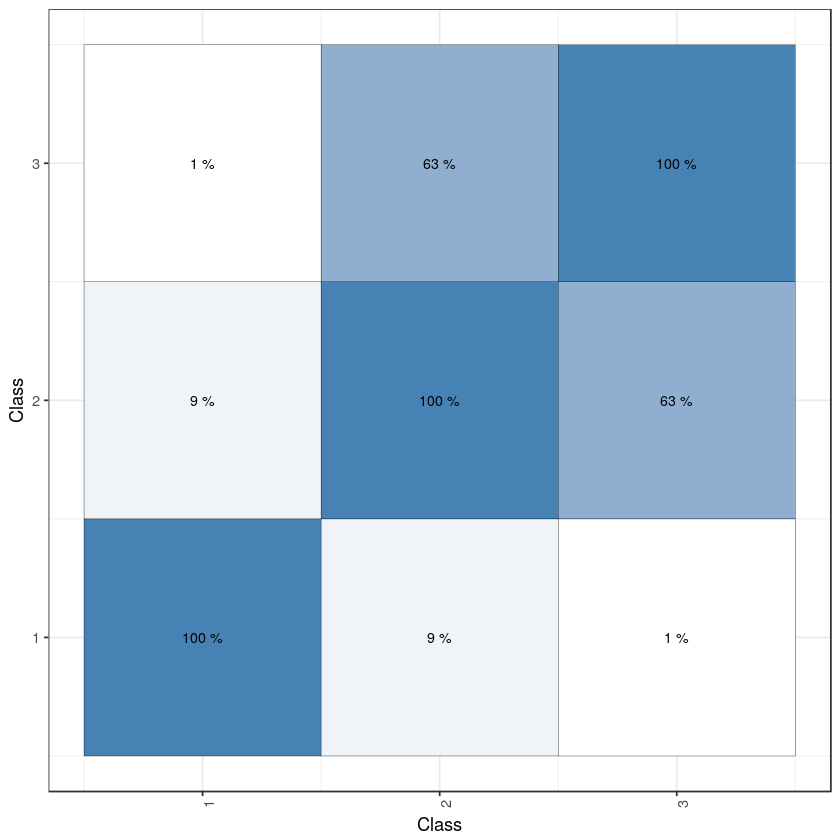

In [82]:
tky<-TukeyHSD(aov( value ~ cl, data=df))
tky.result<-data.frame(tky$cl)
cn <-sort(unique(df$cl))
resm <- matrix(NA, length(cn),length(cn))
rownames(resm) <- cn
colnames(resm) <- cn
resm[lower.tri(resm) ] <- round(tky.result$p.adj,4)
resm[upper.tri(resm) ] <- t(resm)[upper.tri(resm)] 
diag(resm) <- 1
library(ggplot2)
library(reshape2)
dfResm <- melt(resm)
ggplot(dfResm, aes(x=Var1, y=Var2, fill=value))+
  geom_tile(colour = "black")+
  geom_text(aes(label=paste(round(value*100,0),"%")),size = 3) +
  scale_fill_gradient(low = "white",high = "steelblue")+
  ylab("Class")+xlab("Class")+theme_bw()+
  theme(axis.text.x = element_text(angle = 90, hjust = 1),legend.position="none")

# ANOVA dos grupos

El ANOVA de dos grupos es una extensión del ANOVA de un factor en el que hay dos variables (factores) que interactúan con los datos. En este caso, los datos se dan en forma de matriz donde cada celda tendrá las muestras correspondientes a los dos factores dependientes, uno dado por el número de fila y otro por el número de columna.

La hipótesis nula afirma que todos los grupos tienen la misma media:
\\[
\begin{split}
H_0 &: \beta_1 = \beta_2 = \beta_3 = 0\\
H_1 &: \text{al menos un par }\beta_j\ne \beta_i
\end{split}
\\]
Estas hipótesis examinan si las muestras siguen la siguiente regresión lineal de diferentes grupos: $y_{i}=\beta_0+\beta_1x_{i1}+\beta_2x_{i2}+\beta_3x_{i1}x_{i2}+\varepsilon_{i}=\widehat{y_i}+\varepsilon_{i}$, donde:
* $y_{i}$ es la variable dependiente, muestra i-ésima.
* $\beta_0$ es un coeficiente desconocido que tiene que ser estimado, es independiente de todas las variables.
* $\beta_1$ es un coeficiente desconocido que tiene que ser estimado para la primera variable independiente $x_{i1}$.
* $\beta_2$ es un coeficiente desconocido que tiene que ser estimado para la segunda variable independiente $x_{i2}$.
* $\beta_3$ es un coeficiente desconocido que tiene que ser estimado, refleja la interdepencia entre $x_{i1}$ y $x_{i2}$.
* $x_{i1}$ es la primera variable dependiente asociada con la i-ésima muestra.
* $x_{i2}$ es la segunda variable dependiente asociada con la i-ésima muestra.
* $\varepsilon_{ij}$ son los errores resultantes del modelo.
* $\widehat{y_i}$ es la estimación de la i-esima variable.
* $k$ es el número de grupos
* $n$ es el número total de muestras


El test estadítico F es:
\\[
F=\frac{\sum_{j=1}^{n} \left ( \widehat{y_j}-\bar{y} \right )^2 / k }{\sum_{j=1}^{k} \sum_{i=1}^{n_j} \left ( y_{ij}-\widehat{y_j} \right )^2 / \left ( n-k-1 \right ) }
\\]

### Funciones en R

In [83]:
varId1<-c(1,2)
varId2<-seq(0,5,length=4)
var1<-c(rep(varId1,each=50))
var2<-c(rep(varId2,length.out=length(var1)))

y<-rnorm(length(var1),mean=0,sd=2)+var1+var2
dfy<-data.frame(y,var1,var2)

summary(aov( y ~ var1*var2, data=dfy))


            Df Sum Sq Mean Sq F value   Pr(>F)    
var1         1   18.3   18.32   5.047    0.027 *  
var2         1  248.7  248.69  68.525 7.31e-13 ***
var1:var2    1    0.0    0.00   0.001    0.972    
Residuals   96  348.4    3.63                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

# Tablas de contingencia

Una tabla de contingencia es una tabla o matriz que muestar la frecuencia de ocurrencia de diferentes variables.

||perro|gato|
|-|-|-|
|blanco|10|5|
|negro|4|3|

## Chi cuadrado

El test chi cuadrado de Pearson puede ser usado como un test para validad la **independencia de datos categóricos**. Las hipótesis son:
* La hipótesis nula $H_0$ es que las variables son independientes, no hay asociación estadística.
* La hipótesis alternativa $H_1$ es que hay una relación estadístico o asociación entre variables.

Este test hace las siguientes suposiciones:
* Muestra obtenida por muestreo aleatorio.
* La muestra es lo suficientemente grande.
* El conteo en cada celda también tiene que ser estadísticamente significativo.
* Las muestras se suponen independientes, los datos no pueden estar correlados.



### Una variable

En esta caso las observaciones consisten en valores de una única variable independiente (ej: un dado).
El valor del test estadístico es:

\\[
\chi^2 = \sum_{i=1}^{n} \frac{(O_i-E_i)^2}{E_i} = N \sum_i^n \frac{(O_i/N-p_i)^2}{p_i}
\\]

Donde:
* $N$ es el número total de elementos observados.
* $O_i$ es el número de elementos observados en la categoría *i*.
* $E_i$ es el número de elementos esperados en la categoría *i*.
* $p_i$ es la probabilidad esperada de encontrar un elemento en la categoría *i*. $$p_i=E_i/N$$
* $n$ es el número de categoría en el estudio.

Este estadístico es usado para calcular el p-valor comparando el valor del estadístico con la distribución chi-cuadrado donde el número de grados de libertad será $n-1$.

#### Funciones en R

Por ejemplo, imaginemos que queremos comprobar si un dado de 4 lados es justo, es decir, si no está trucado. Tiramos 40 veces y apuntamos el número de veces. La tabla de frecuencias que aparece es:

|**1**|**2**|**3**|**4**|
|---|---|---|---|
| 10| 7 | 9 | 14|


In [6]:
observed<-c(10,7,9,14)
N<-sum(observed)
expected<-N/length(observed)
test<-sum((observed-expected)^2/expected)

pvalue<-1-pchisq(test,length(observed)-1)
print(paste("El pvalor es",pvalue))

[1] "El pvalor es 0.457489546878183"


El p-valor para aceptar la hipótesis nula es muy alto, así que podemos asumir $H_0$ y suponer que el dado probablemente sea justo. La función *chisq.test* de R puede ser usada para este propósito:

In [7]:
chisq.test(observed)


	Chi-squared test for given probabilities

data:  observed
X-squared = 2.6, df = 3, p-value = 0.4575


### Dos variables

En este caso, una observación consiste en los valores de dos variables. La hipótesis nula es que la ocurrencia de estos valores sea estadísticamente independiente. Cada observación está localizada en una celda de una matriz llamada tabla de contingencia. Si hay $r$ filas y $c$ columnas en la tabla, la frecuencia teórica por cada celda, bajo la hipótesis de independencia es:

\\[
    E_{i,j}=N p_i p_j
\\]
Donde:
* p_i: Es la probabilidad de la fila $i$.
* p_j: Es la probabilidad de la columna $j$.

En este caso el valor del test estadístico es:

\\[
\chi^2 = \sum_i\sum_j \frac{(O_{i,j}-E_{i,j})^2}{E_{i,j}} 
\\]

Y el número de grados de libertad es $$(r-1)(c-1)$$.

#### Funciones en R

Imaginemos que tenemos tres grupos de personas, A, B y C y les preguntamos si les gustan más los gatos o los perros. Obtendríamos la siguietne tabla:

| |**A**|**B**|**C**|
|---|---|---|---|
|cats | 100| 205 | 95  |
|dogs | 203| 401 | 205 |


In [8]:
M <- as.table(rbind(c(100, 205, 95), c(203, 401, 205)))
dimnames(M) <- list(animal = c("cats", "dogs"), group = c("A","B", "C"))
chisq.test(M)


	Pearson's Chi-squared test

data:  M
X-squared = 0.42478, df = 2, p-value = 0.8087


El elevado p-valor de 0.81 indica que podemos aceptar $H_0$, lo que significa que no hay diferencias en los grupos de personas que le gustan los perros y los gatos.

Si modificamos una celda del grupo **C** y perros, obtenenemos un resultado diferente, en este caso tenemos que rechazar la hipótesis nula $H_0$ y asumir que hay diferencias entre perros y gatos para el siguiene grupo:

| |**A**|**B**|**C**|
|---|---|---|---|
|cats | 100| 205 | 95  |
|dogs | 203| 401 | 275 |

In [9]:
M <- as.table(rbind(c(100, 205, 95), c(203, 401, 275)))
chisq.test(M)$p.value

[1] 0.02174804

## Fisher

El test exacto de Fisher siempre da el valor exacto del pvalor, a diferencia del test chi cuadrado el cual es solamente una aproximación, además funciona bien con muestras pequeñas. El test es difícil de calcular a mano, pero fácil de calcular en R con la función *fisher.test*.


In [10]:
M <- as.table(rbind(c(100, 205, 95), c(203, 401, 275)))
fisher.test(M)



	Fisher's Exact Test for Count Data

data:  M
p-value = 0.02023
alternative hypothesis: two.sided
